### Lab 23: Convolutional Autoencoder for MNIST Image Reconstruction

Objective: Implement a convolutional autoencoder for image reconstruction



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.2217 - val_loss: 0.0791
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0781 - val_loss: 0.0731
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0730 - val_loss: 0.0709
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0714 - val_loss: 0.0704
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0702 - val_loss: 0.0688
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0692 - val_loss: 0.0681
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0685 - val_loss: 0.0677
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0680 - val_loss: 0.0672
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0676 - val_loss: 0.0667
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0673 - val_loss: 0.0663


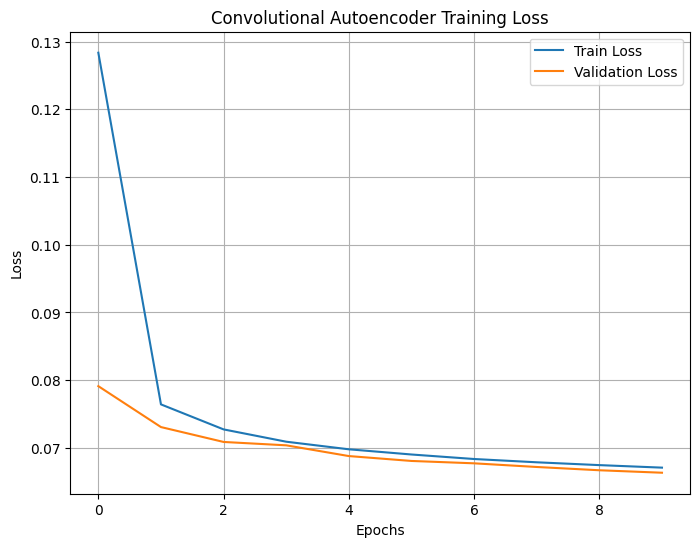

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


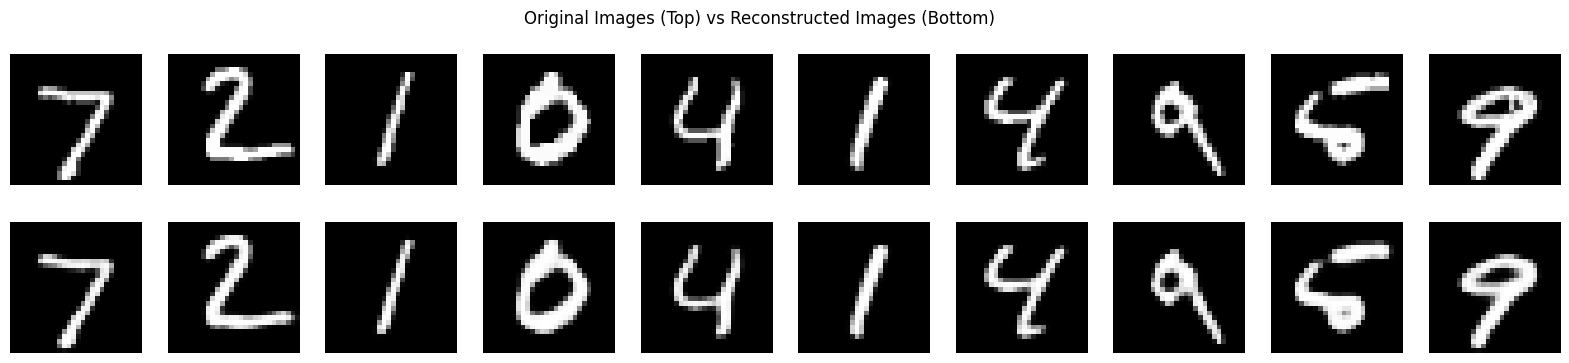

Reconstruction MSE: 0.002032


In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# 1. Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension
x_train = np.expand_dims(x_train, axis=-1)  # (N, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)

# 2. Build Convolutional Autoencoder
# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Models
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 3. Train Autoencoder
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# 4. Plot Training Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Convolutional Autoencoder Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 5. Encode and Decode Images
decoded_imgs = autoencoder.predict(x_test)

# 6. Visualization: Original vs Reconstructed
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle("Original Images (Top) vs Reconstructed Images (Bottom)")
plt.show()

# 7. Evaluate Reconstruction Quality
mse = mean_squared_error(x_test.reshape(len(x_test), -1),
                         decoded_imgs.reshape(len(decoded_imgs), -1))
print(f"Reconstruction MSE: {mse:.6f}")
